In [15]:
using Crystalline, MPBUtils, JLD2, PyPlot, DelimitedFiles

In [10]:
dir = "./symeigs/output"

symeigsdv = Dict{Integer, Dict{String, Vector{Vector{ComplexF64}}}}()
summariesv = Dict{Integer, Vector{BandSummary}}()
cum_summariesv = Dict{Integer, Vector{BandSummary}}()

mode = "te"
brs = bandreps(10, 2)
for id in [20132,20772,21152,21548,22488,23742,25243,27021,27163,28064,28159,28545,29229,29939]
    println(id); flush(stdout)
    symeigsd, lgd = read_symdata("dim2-sg10-$(id)-res192-$mode", dir = dir)
    fixup_gamma_symmetry!(symeigsd, lgd, Symbol(uppercase(mode)))
    lgirsd = pick_lgirreps(lgd)
    
    push!(symeigsdv, id => symeigsd)
    summaries = analyze_symmetry_data(symeigsd, lgirsd, brs)            
    push!(summariesv, id  => summaries)
    push!(cum_summariesv, id => cumsum(summaries))
    
end

20132
20772
21152
21548
22488
23742
25243
27021
27163
28064
28159
28545
29229
29939


In [22]:
dispersions = Dict{Integer, Matrix{Float64}}()


Dict{Integer, Matrix{Float64}}()

In [24]:
for id in [20132,20772,21152,21548,22488,23742,25243,27021,27163,28064,28159,28545,29229,29939]
    push!(dispersions, id => readdlm("../../dispersions/output/dim2-sg10-$id-res192-te-dispersion.out", ',') )
end

In [26]:
jldopen("cumfragiledata", "w") do fid
    fid["dispersions"] = dispersions
    fid["symeigsdv"] = symeigsdv
    fid["summariesv"] = summariesv
    fid["cumsummariesv"] = cum_summariesv
end

Dict{Integer, Vector{BandSummary}} with 14 entries:
  21152 => [2-band (nontrivial): [X₁+X₂, M₃M₄, 2Γ₁], 3-band (fragile): [X₁+2X₂,…
  22488 => [1-band (nontrivial): [X₂, M₁, Γ₁], 3-band (fragile): [X₁+2X₂, M₁+M₃…
  23742 => [2-band (nontrivial): [X₁+X₂, M₃M₄, 2Γ₁], 3-band (fragile): [X₁+2X₂,…
  20132 => [2-band (nontrivial): [X₁+X₂, M₃M₄, 2Γ₁], 3-band (fragile): [2X₁+X₂,…
  27021 => [1-band (trivial): [X₂, M₂, Γ₁], 3-band (fragile): [2X₁+X₂, M₂+M₃M₄,…
  28545 => [1-band (nontrivial): [X₂, M₁, Γ₁], 3-band (fragile): [X₁+2X₂, M₁+M₃…
  25243 => [2-band (nontrivial): [X₁+X₂, M₃M₄, 2Γ₁], 3-band (fragile): [X₁+2X₂,…
  20772 => [2-band (nontrivial): [X₁+X₂, M₃M₄, 2Γ₁], 3-band (fragile): [X₁+2X₂,…
  28064 => [2-band (nontrivial): [X₁+X₂, M₃M₄, 2Γ₁], 3-band (fragile): [X₁+2X₂,…
  29939 => [2-band (nontrivial): [X₁+X₂, M₃M₄, 2Γ₁], 3-band (fragile): [2X₁+X₂,…
  27163 => [2-band (nontrivial): [X₁+X₂, M₃M₄, 2Γ₁], 3-band (fragile): [2X₁+X₂,…
  21548 => [2-band (nontrivial): [X₁+X₂, M₃M₄, 2Γ₁], 3-ba

In [ ]:
for (i, id) in enumerate([20132,20772,21152,21548,22488,23742,25243,27021,27163,28064,28159,28545,29229,29939])
    subplot(2, 7, i)
    bands = readdlm("../../dispersions/output/dim2-sg10-$id-res192-te-dispersion.out", ',');
    plot(bands[:, 6:(3 .+ 6)], color="red")
    plot(bands[:, (3 .+ 6):end], color="black")

    ylim(0, 0.8)
    xticks([])
end    


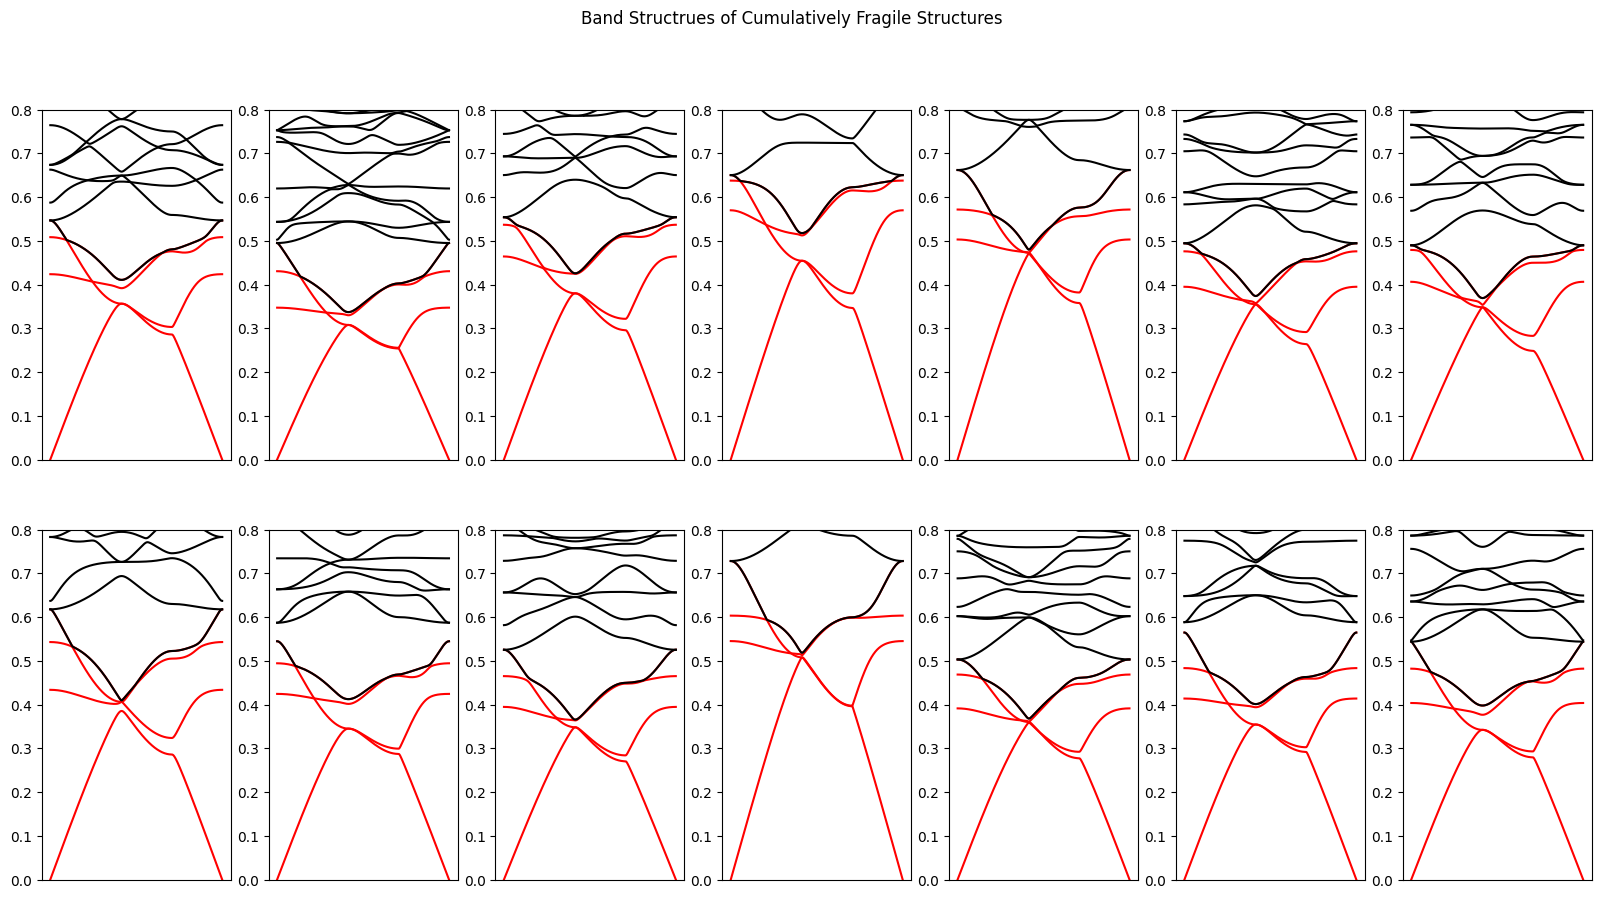

PyObject Text(0.5, 0.98, 'Band Structrues of Cumulatively Fragile Structures')

In [18]:
figure(figsize=(20, 10))
for (i, id) in enumerate([20132,20772,21152,21548,22488,23742,25243,27021,27163,28064,28159,28545,29229,29939])
    subplot(2, 7, i)
    bands = readdlm("../../dispersions/output/dim2-sg10-$id-res192-te-dispersion.out", ',');
    plot(bands[:, 6:(3 .+ 6)], color="red")
    plot(bands[:, (3 .+ 6):end], color="black")

    ylim(0, 0.8)
    xticks([])
end    
suptitle("Band Structrues of Cumulatively Fragile Structures")
